In [1]:
import scipy
import scipy.spatial
import scipy.cluster.hierarchy as sch
import numpy
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA 
from matplotlib import pyplot
from sklearn.cluster import AgglomerativeClustering

import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

sns.set_theme(style="dark", palette="dark")

In [2]:
df = pd.read_csv("Country-data.csv", index_col=0)

**ANÁLISE EXPLORATÓRIA DE DADOS**

In [3]:
df.head()

child_mort  exports  health  imports  income  inflation  \
country                                                                        
Afghanistan                90.2     10.0    7.58     44.9    1610       9.44   
Albania                    16.6     28.0    6.55     48.6    9930       4.49   
Algeria                    27.3     38.4    4.17     31.4   12900      16.10   
Angola                    119.0     62.3    2.85     42.9    5900      22.40   
Antigua and Barbuda        10.3     45.5    6.03     58.9   19100       1.44   

                     life_expec  total_fer   gdpp  
country                                            
Afghanistan                56.2       5.82    553  
Albania                    76.3       1.65   4090  
Algeria                    76.5       2.89   4460  
Angola                     60.1       6.16   3530  
Antigua and Barbuda        76.8       2.13  12200

In [4]:
#Quantos países existem no dataset? = 167
print(df.shape)
df.index

(167, 9)


Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=167)

In [5]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [7]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [8]:
col = list(df.columns)
n_features = [*col]
print('Numerical Features :',*n_features)

Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


In [9]:
def plot_destribution(df, titlelabel = ''):
    fig, ax = pyplot.subplots(nrows = 3,ncols = 3,figsize = (15,12))
    for i in range(len(n_features)):
        pyplot.subplot(3,3,i+1)
        ax = sns.distplot(df[n_features[i]])                
        ax.set(xlabel=None)
        ax.set(ylabel=None)
        title = 'Distribuição: ' + n_features[i] + ' (' + titlelabel + ')'
        pyplot.title(title)    
    pyplot.show()

In [10]:
def ploat_features_low_and_High_country(target, label, highlabel='alta', lowlevel='baixa'):
    data = pd.read_csv("Country-data.csv")    
    fig = pyplot.subplots(nrows = 1, ncols = 2,figsize = (25,7))
    pyplot.subplot(1,2,1)
    ax = sns.barplot(x = 'country', y = target, data = data.sort_values(ascending = False, by = target).iloc[:5],edgecolor = 'black');
    pyplot.title('Países com '+ highlabel + ' ' + label)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                horizontalalignment='center', fontsize = 12)

    pyplot.subplot(1,2,2)
    ax = sns.barplot(x = 'country', y = target, data = data.sort_values(ascending = False, by = target).iloc[162:167],edgecolor = 'black');
    pyplot.title('Países com ' + lowlevel + ' ' + label)
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
                horizontalalignment='center', fontsize = 12)
    pyplot.show()    

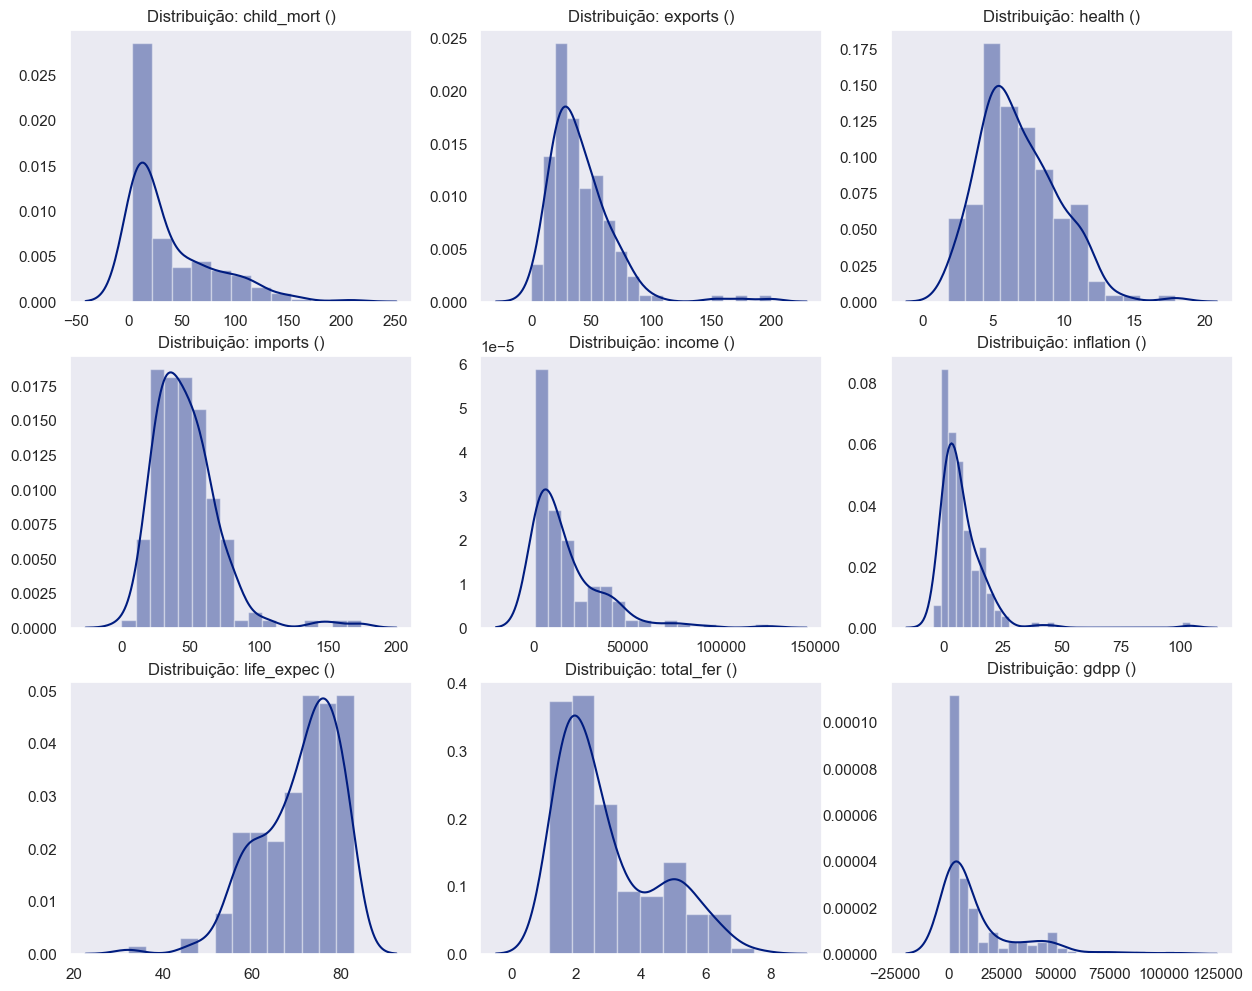

In [11]:
plot_destribution(df)

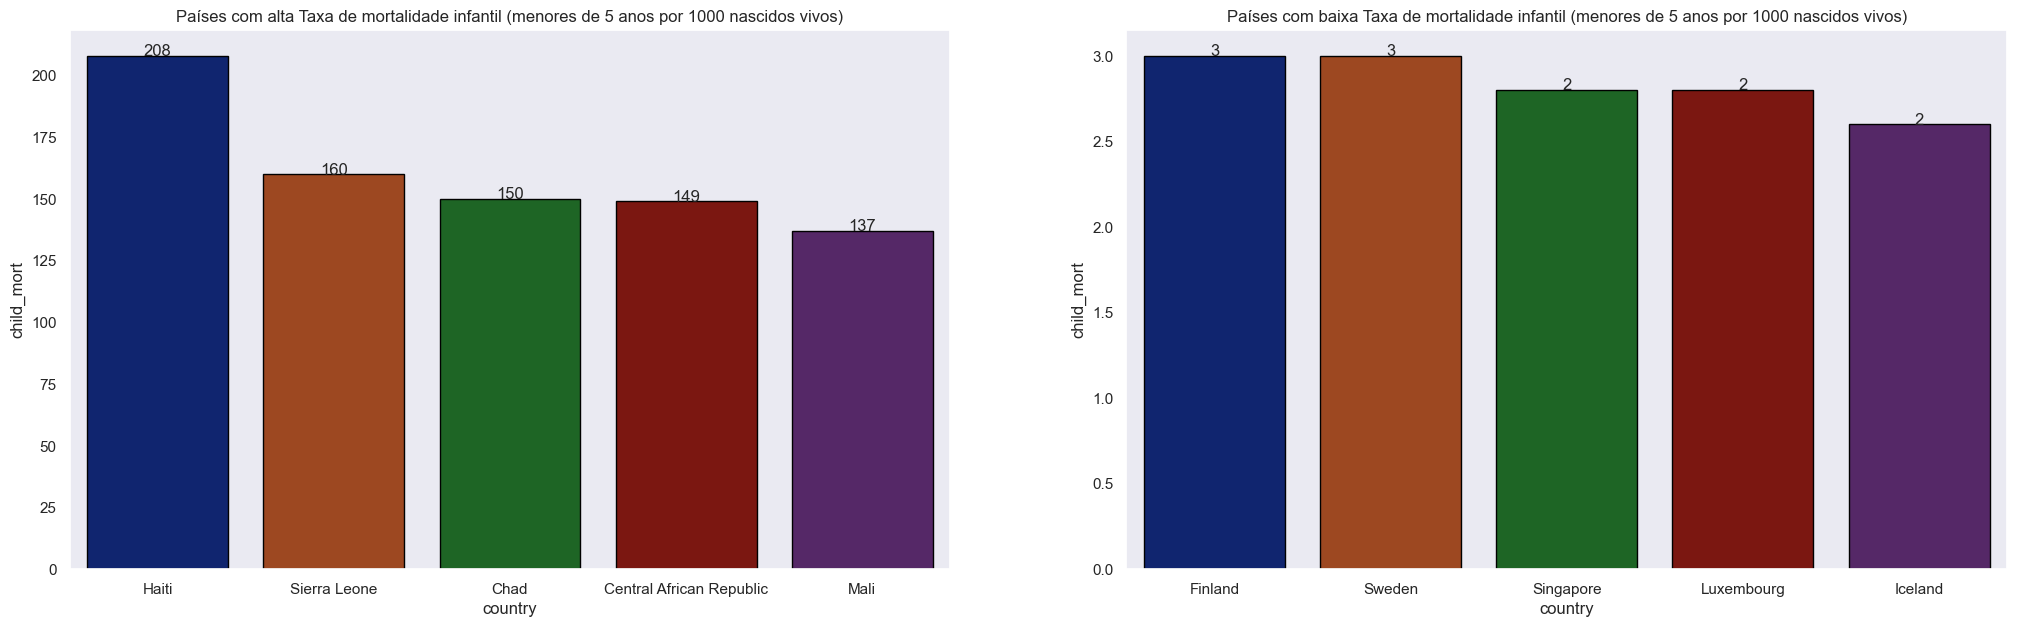

In [12]:
ploat_features_low_and_High_country('child_mort', 'Taxa de mortalidade infantil (menores de 5 anos por 1000 nascidos vivos)')

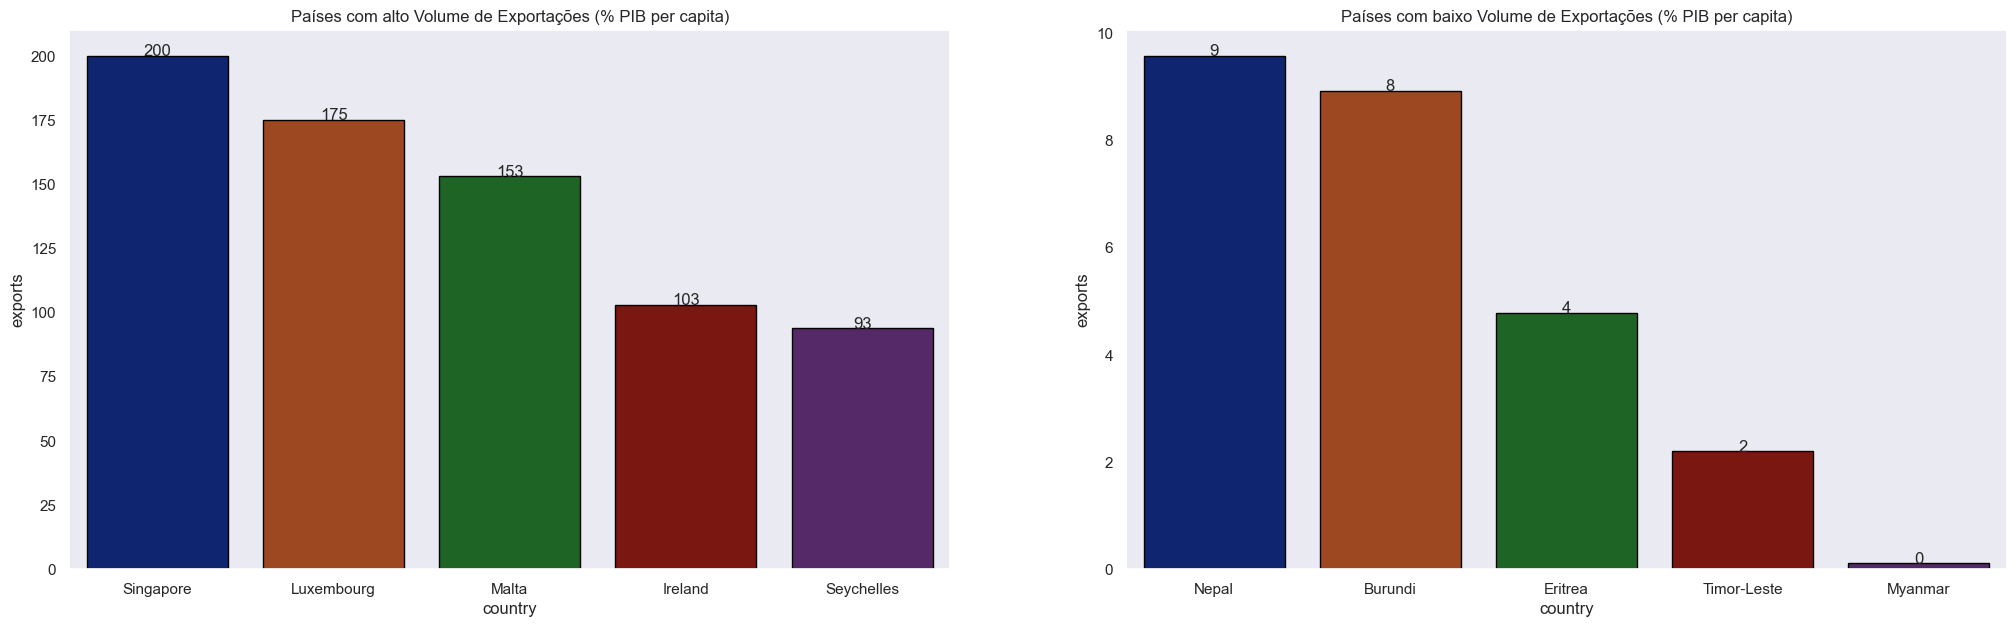

In [13]:
ploat_features_low_and_High_country('exports', 'Volume de Exportações (% PIB per capita)', 'alto', 'baixo')

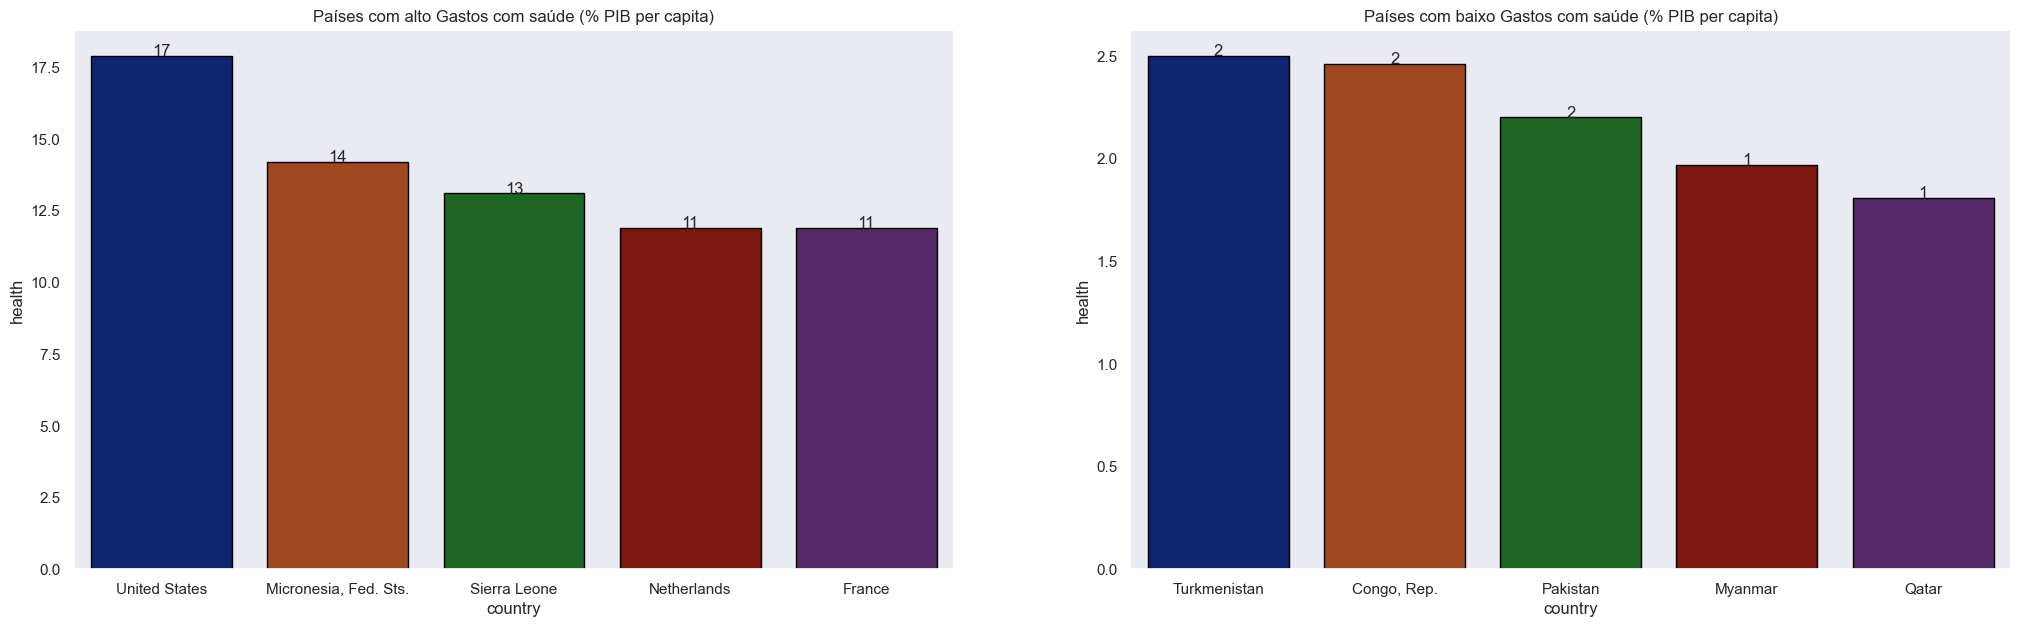

In [14]:
ploat_features_low_and_High_country('health', 'Gastos com saúde (% PIB per capita)', 'alto', 'baixo')

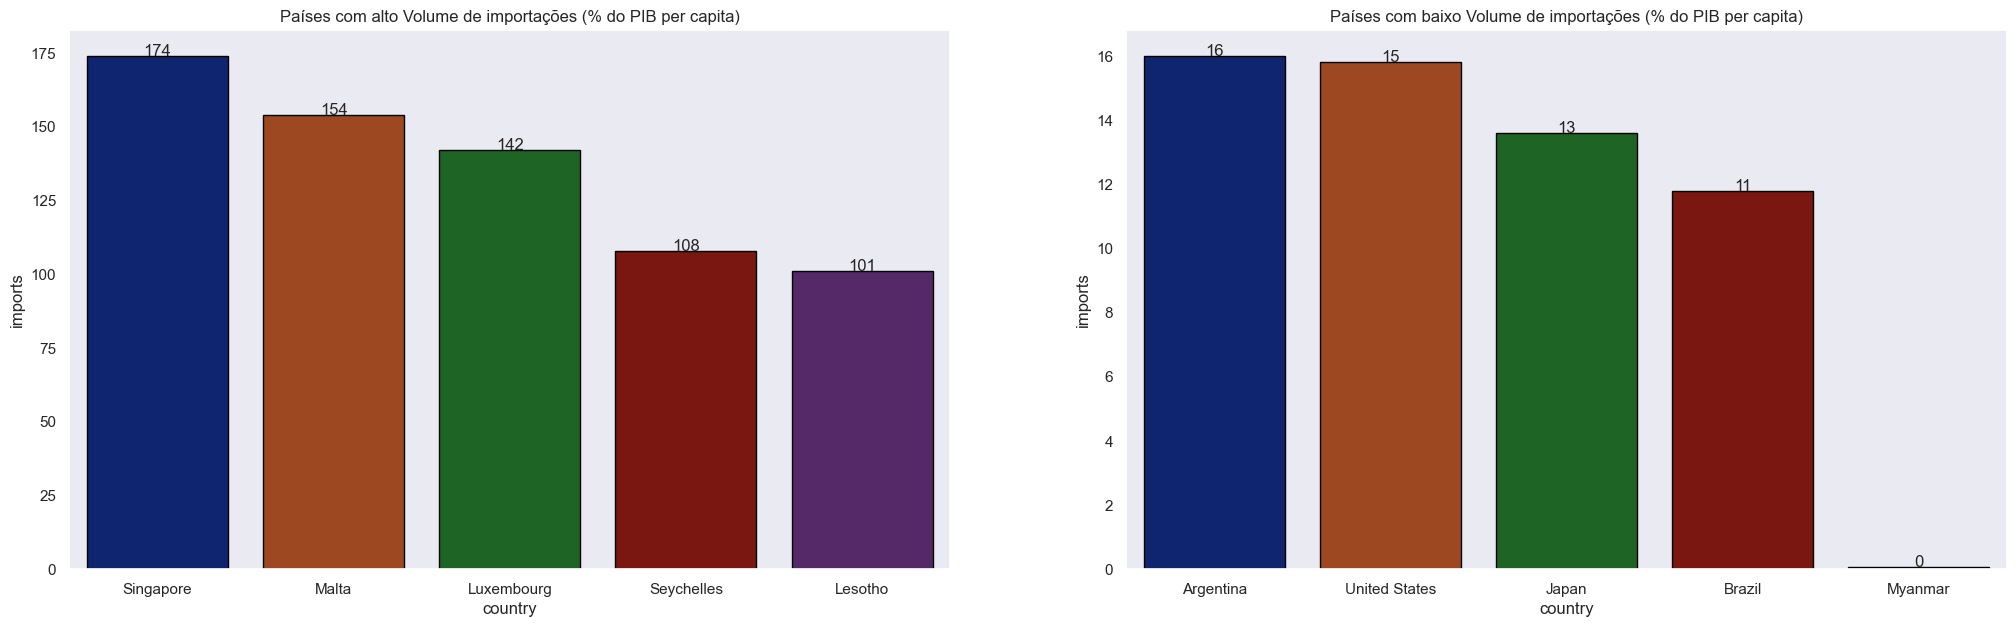

In [15]:
ploat_features_low_and_High_country('imports', 'Volume de importações (% do PIB per capita)', 'alto', 'baixo')

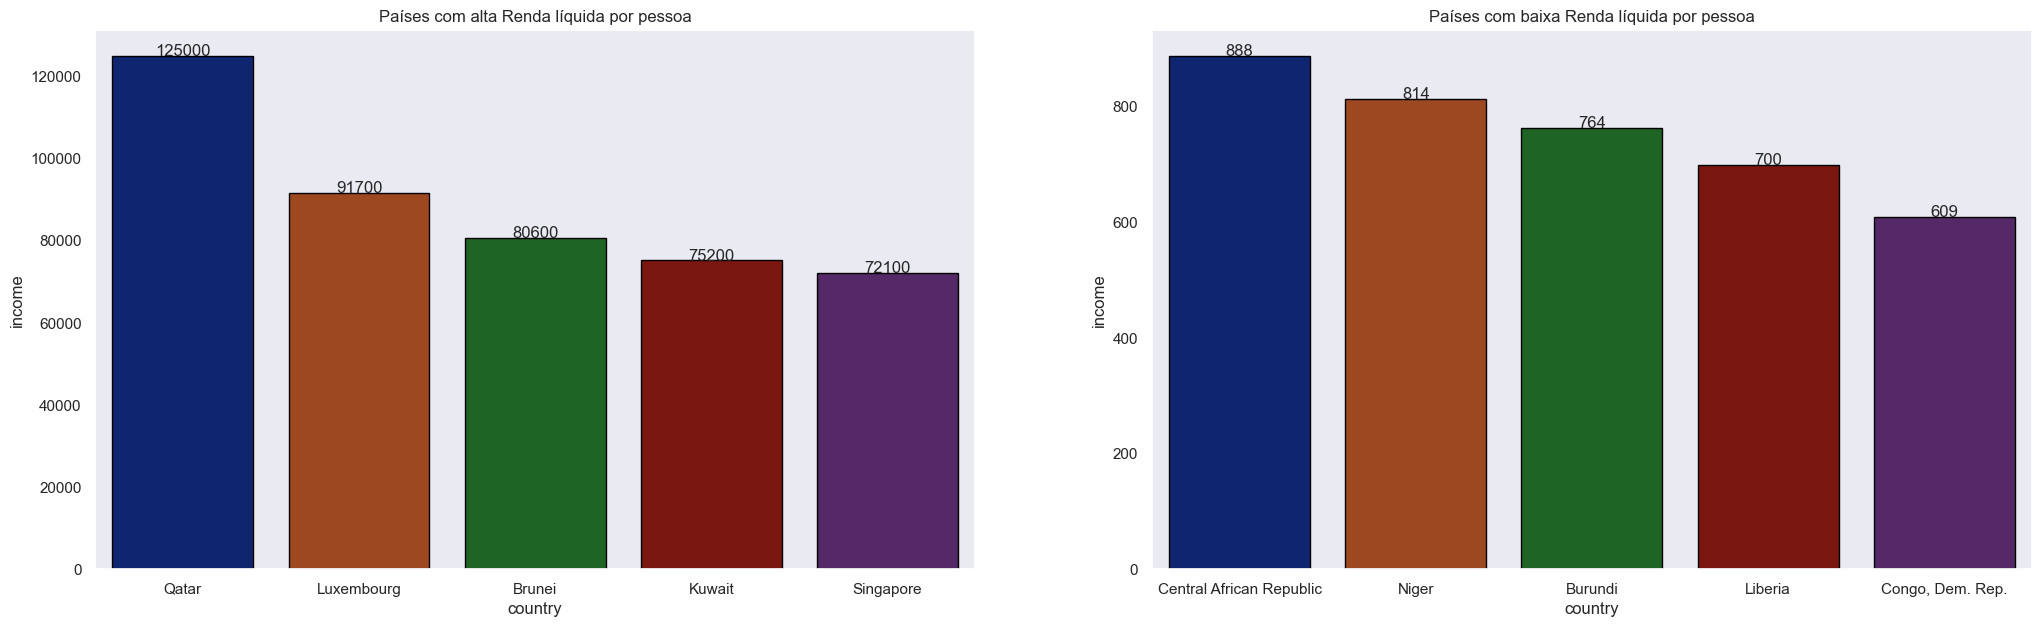

In [16]:
ploat_features_low_and_High_country('income', 'Renda líquida por pessoa', 'alta', 'baixa')

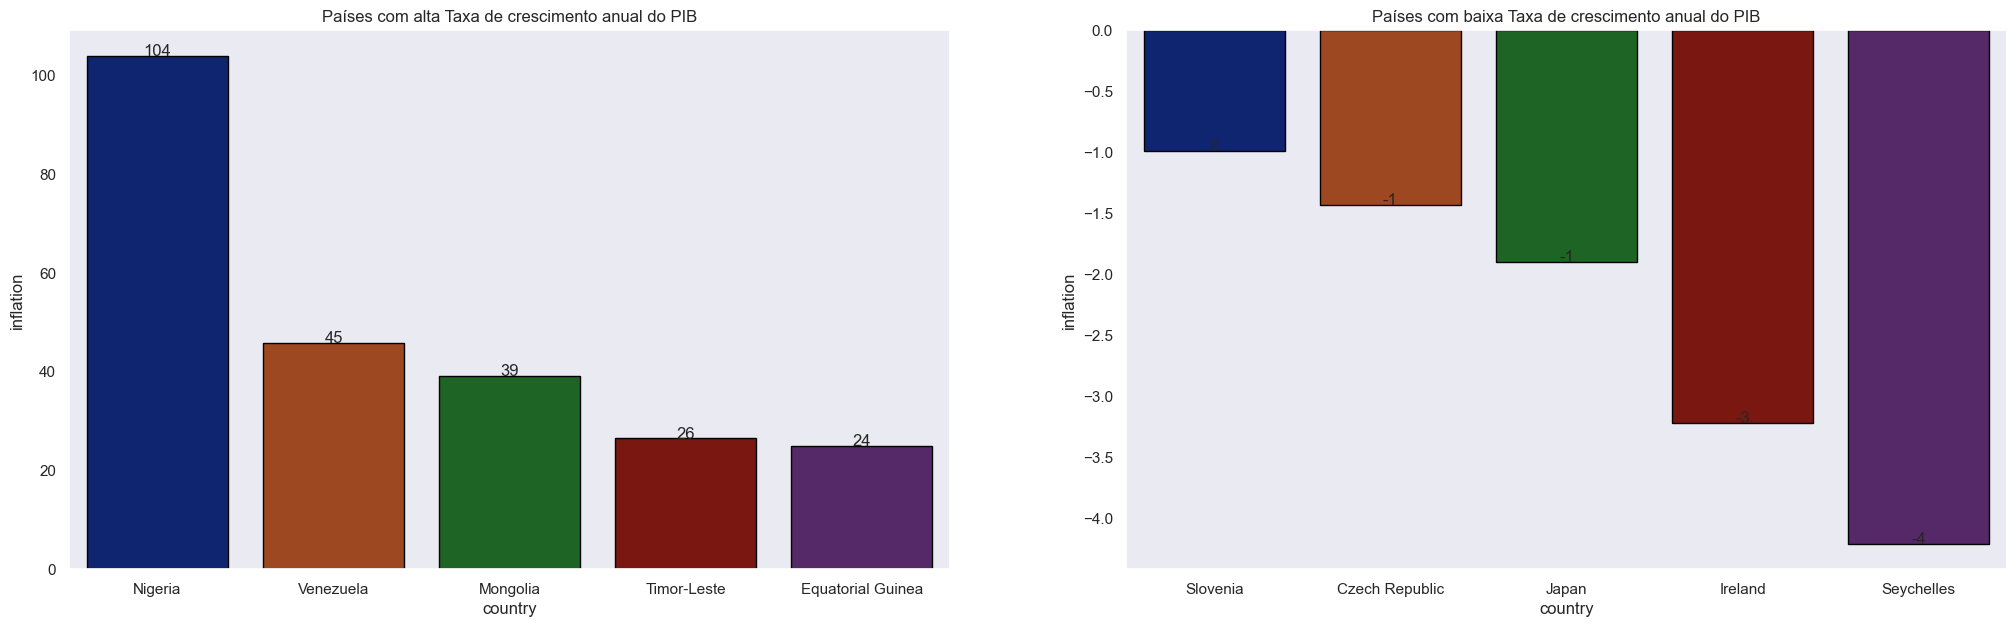

In [17]:
ploat_features_low_and_High_country('inflation', 'Taxa de crescimento anual do PIB', 'alta', 'baixa')

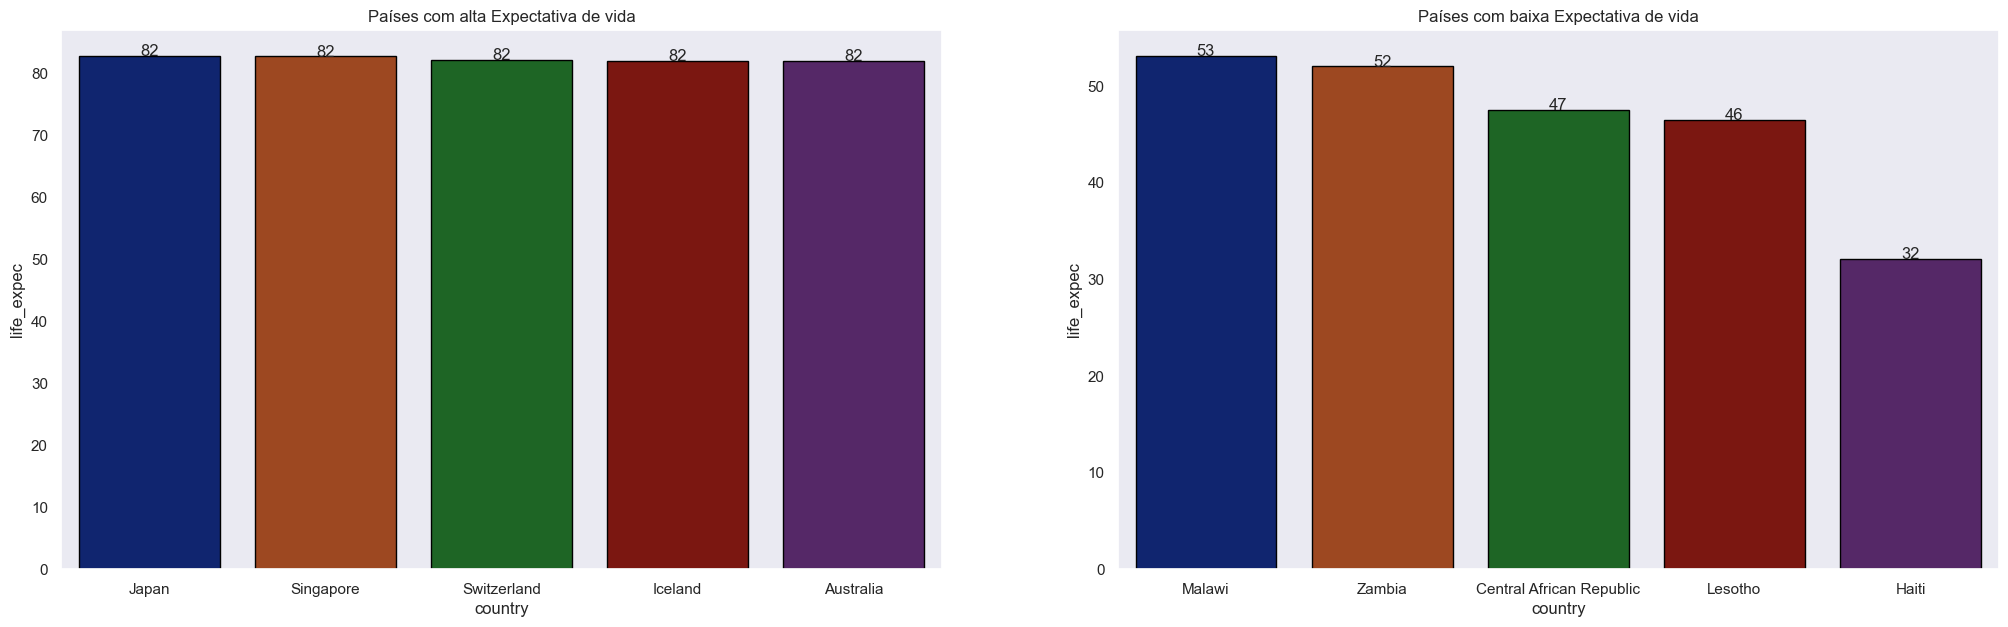

In [18]:
ploat_features_low_and_High_country('life_expec', 'Expectativa de vida', 'alta', 'baixa')

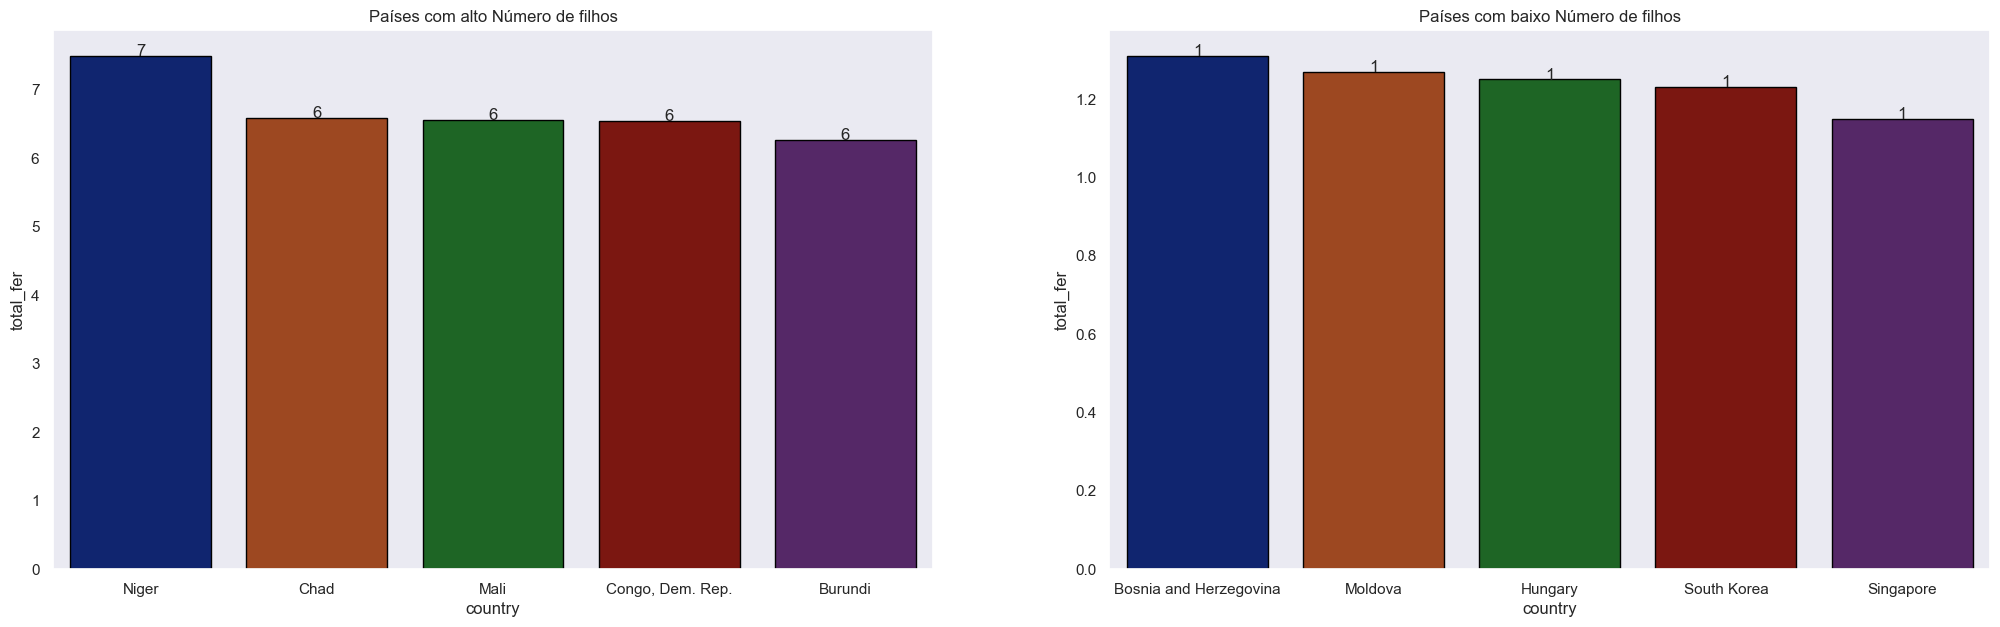

In [19]:
ploat_features_low_and_High_country('total_fer', 'Número de filhos', 'alto', 'baixo')

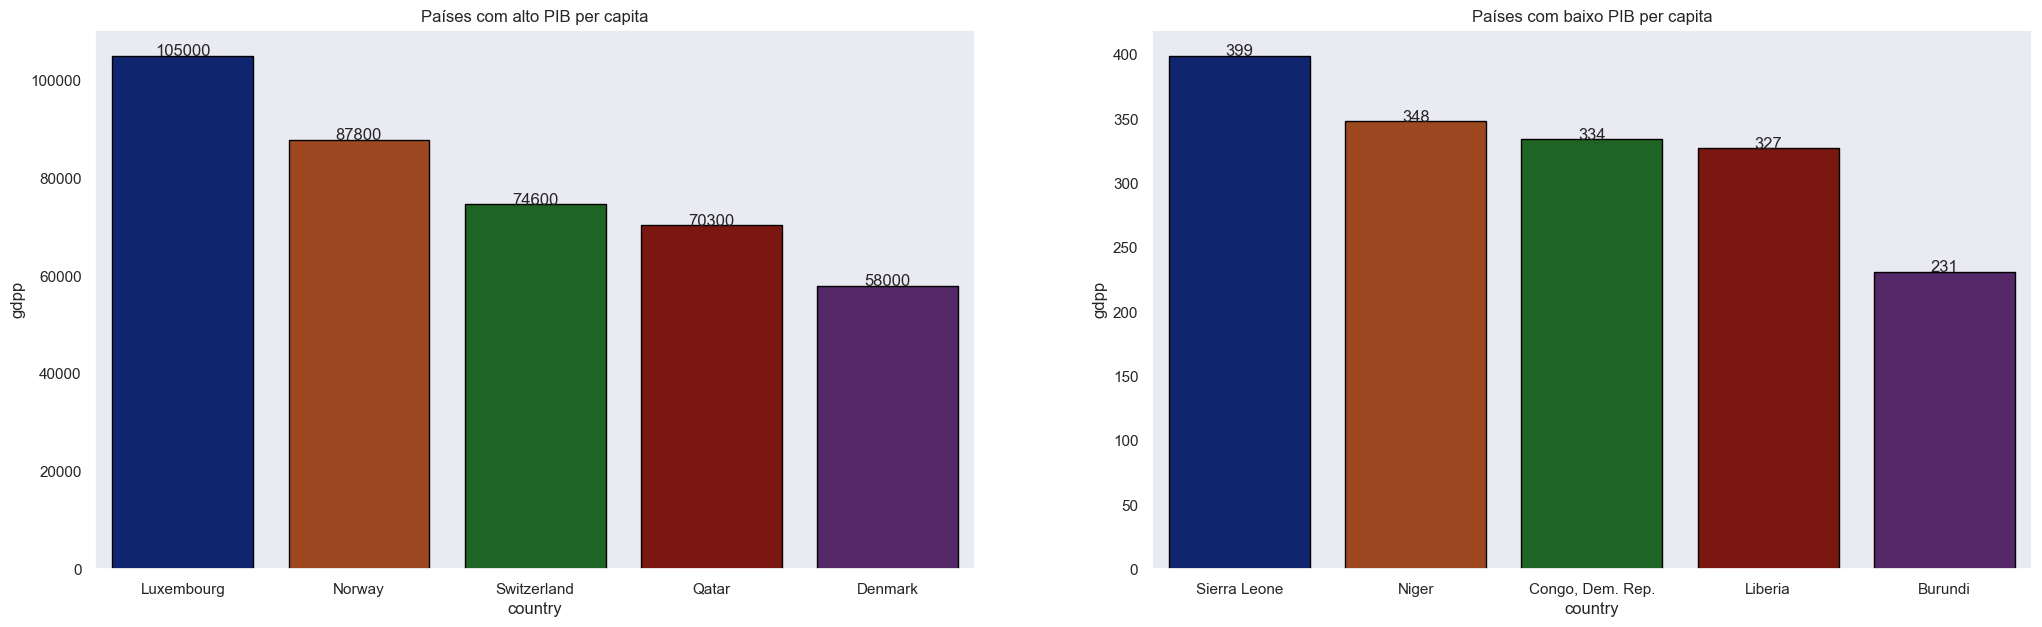

In [20]:
ploat_features_low_and_High_country('gdpp', 'PIB per capita', 'alto', 'baixo')

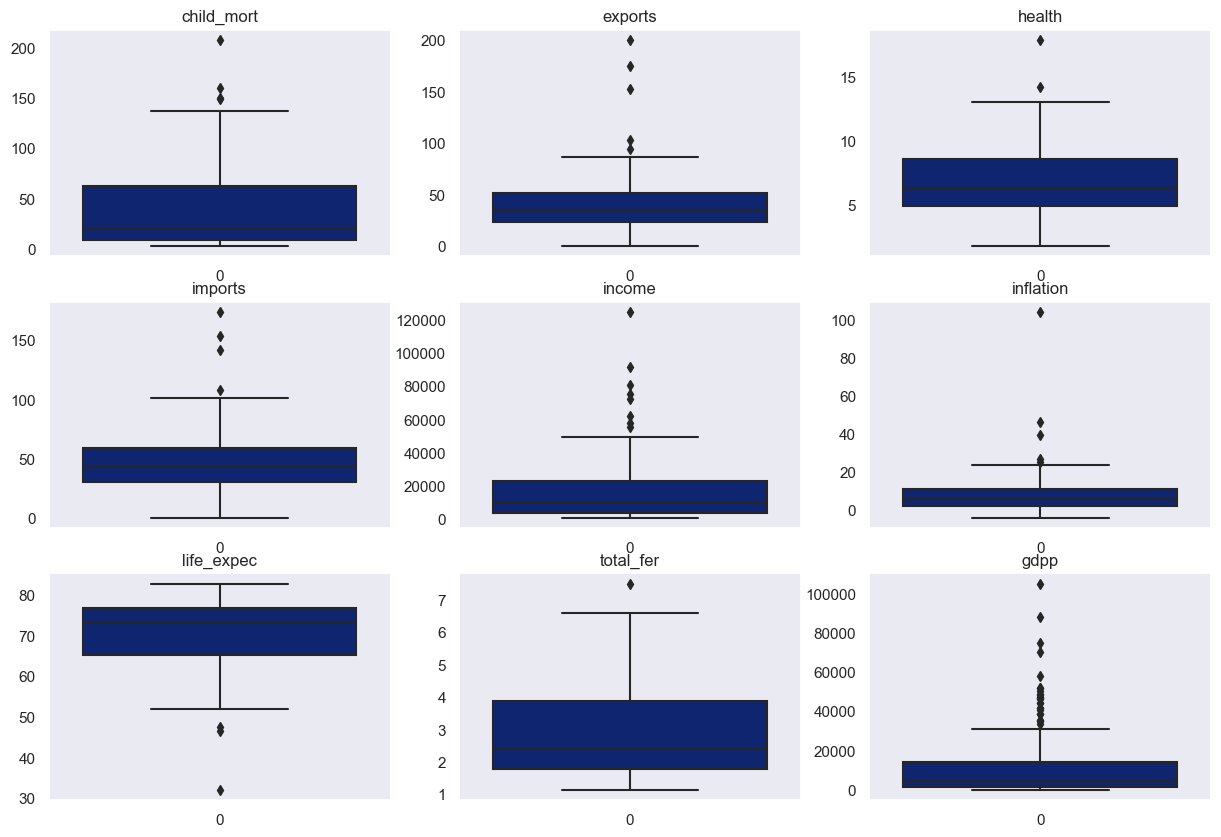

In [21]:
fig  = pyplot.subplots(nrows = 3,ncols = 3,figsize = (15,10))
for i in range(len(n_features)):
    pyplot.subplot(3,3,i+1)
    ax = sns.boxplot(df[n_features[i]])
    pyplot.title(n_features[i])
pyplot.show()

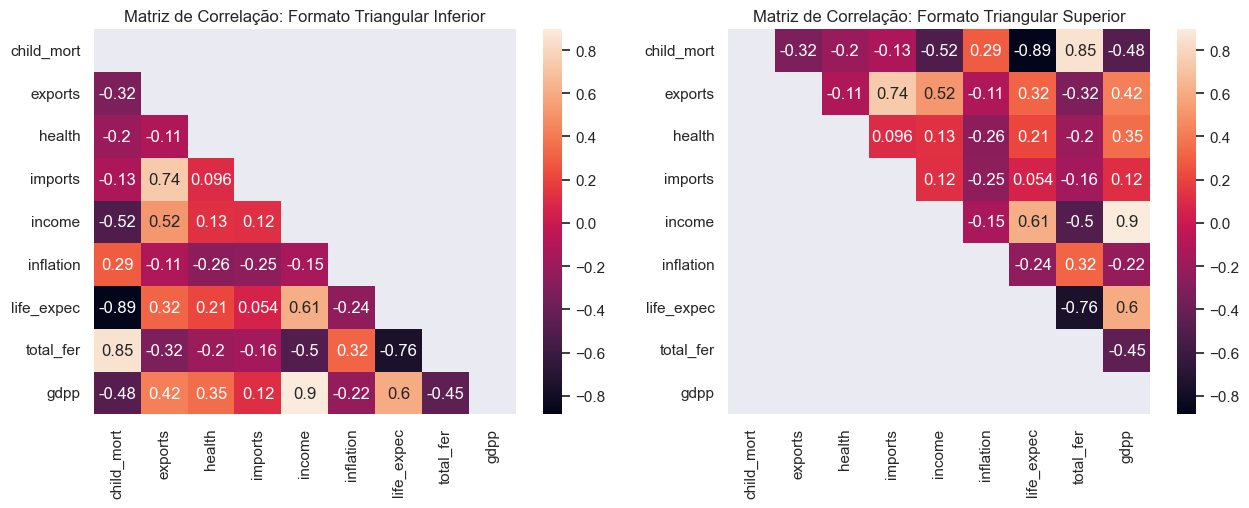

In [22]:
ut = numpy.triu(df.corr())
lt = numpy.tril(df.corr())

fig,ax = pyplot.subplots(nrows = 1, ncols = 2,figsize = (15,5))
pyplot.subplot(1,2,1)
sns.heatmap(df.corr(),annot = True,cbar = 'True',mask = ut);
pyplot.title('Matriz de Correlação: Formato Triangular Inferior');

pyplot.subplot(1,2,2)
sns.heatmap(df.corr(),annot = True,cbar = 'True',mask = lt);
pyplot.title('Matriz de Correlação: Formato Triangular Superior');

In [23]:
#Verificando se existem dados nulos
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

**PRÉ-PROCESSAMENTO DE DADOS**

In [24]:
normalized_df = df.copy(deep=True)
for i in range(len(n_features)):
    normalized_df[n_features[i]] = (df[n_features[i]] - df[n_features[i]].mean()) / df[n_features[i]].std()
normalized_df

child_mort   exports    health   imports    income  \
country                                                                   
Afghanistan            1.287660 -1.134867  0.278251 -0.082208 -0.805822   
Albania               -0.537333 -0.478220 -0.096725  0.070624 -0.374243   
Algeria               -0.272015 -0.098824 -0.963176 -0.639838 -0.220182   
Angola                 2.001787  0.773056 -1.443729 -0.164820 -0.583289   
Antigua and Barbuda   -0.693548  0.160186 -0.286034  0.496076  0.101427   
...                         ...       ...       ...       ...       ...   
Vanuatu               -0.224902  0.200315 -0.569997  0.239979 -0.736313   
Venezuela             -0.524935 -0.459980 -0.693776 -1.209860 -0.033442   
Vietnam               -0.371199  1.126916  0.008851  1.375892 -0.656429   
Yemen                  0.447072 -0.405259 -0.595481 -0.515920 -0.656948   
Zambia                 1.111607 -0.149897 -0.337002 -0.660491 -0.719195   

                     inflation  life_expec  total_fer      gdpp  
country                                                          
Afghanistan           0.156864   -1.614237   1.897176 -0.677143  
Albania              -0.311411    0.645924  -0.857394 -0.484167  
Algeria               0.786908    0.668413  -0.038289 -0.463980  
Angola                1.382894   -1.175698   2.121770 -0.514720  
Antigua and Barbuda  -0.599944    0.702147  -0.540321 -0.041692  
...                        ...         ...        ...       ...  
Vanuatu              -0.488315   -0.849606   0.364658 -0.545273  
Venezuela             3.606020    0.544723  -0.315728  0.029235  
Vietnam               0.408503    0.286097  -0.659224 -0.635842  
Yemen                 1.496416   -0.343599   1.137523 -0.635842  
Zambia                0.588245   -2.086510   1.619738 -0.627658  

[167 rows x 9 columns]

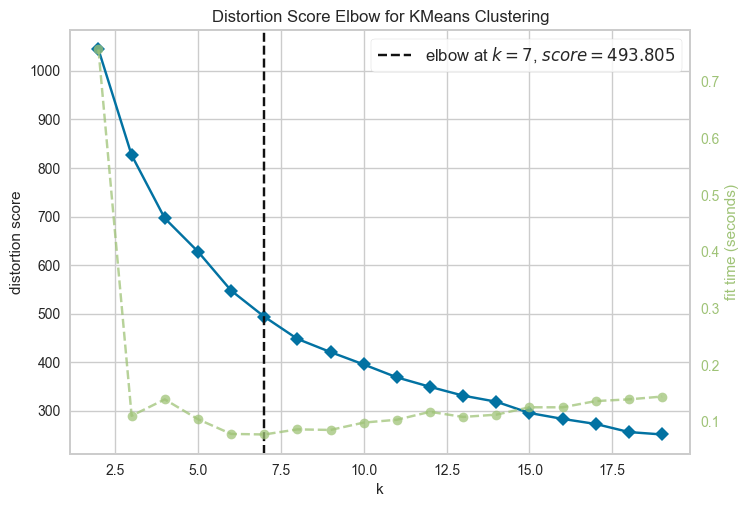

In [25]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 20))
visualizer.fit(normalized_df[n_features]); 
visualizer.poof();

In [26]:
colors = ['Purple', 'Green', 'Red']

def plot_cluster_points(df, labels, ax=None):
    pca = PCA(2) 
    pca_data = pd.DataFrame(pca.fit_transform(df), columns=['PC1','PC2']) 
    pca_data['cluster'] = pd.Categorical(labels)
    sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_data, ax=ax)
    
def plot_cluster_map(df, labels, methodlabel):        
    cluster_df = df.copy(deep=True)    
    cluster_df['country'] = cluster_df.index
    cluster_df['cluster'] = labels
    cluster_df['color'] = ''
    cluster_df['color'].loc[cluster_df['cluster'] == 0] = 'Cluster 0 ('+colors[0]+')'
    cluster_df['color'].loc[cluster_df['cluster'] == 1] = 'Cluster 1 ('+colors[1]+')'
    cluster_df['color'].loc[cluster_df['cluster'] == 2] = 'Cluster 2 ('+colors[2]+')'    
    
    fig = px.choropleth(cluster_df[['country', 'color']],
                        locationmode = 'country names',
                        locations = 'country',
                        title = 'Clusterização de países utilizando '+ methodlabel + ' (n_clusters = 3)',
                        color = cluster_df['color'],
                        color_discrete_map = {'Cluster 0 ('+colors[0]+')':colors[0],
                                              'Cluster 1 ('+colors[1]+')':colors[1],
                                              'Cluster 2 ('+colors[2]+')':colors[2]}                  

                       )
    fig.update_geos(fitbounds = "locations", visible = True)
    fig.update_layout(legend_title_text = 'Legenda',
                      title_y = 0.86,
                      autosize=False,
                      margin = dict(l=30,
                                    r=30,
                                    b=5,
                                    t=5,
                                    pad=4,
                                    autoexpand=True),
                      width=800,
                      height=500)
    fig.show()    
    
def plot_destribution_by_cluster(df, labels, methodlabel):
    cluster_df = df.copy(deep=True)    
    cluster_df['country'] = cluster_df.index
    cluster_df['cluster'] = labels
    
    fig, ax = pyplot.subplots(nrows = 3, ncols = 3, figsize = (20,20))
    
    for i in range(len(n_features)):
        for x in set(labels):
            pyplot.subplot(3,3,i+1)            
            df_filter = cluster_df[(cluster_df['cluster'] == x)]
            sns.distplot(df_filter[n_features[i]], color = colors[x])            
            title = 'Distribuição: ' + n_features[i] + ' (' + methodlabel + ')'
            pyplot.title(title)        
            
    fig.legend(labels=['Cluster 0','Cluster 1', 'Cluster 2'])        
    pyplot.show()                  

## KMeans

In [27]:
kmeans = KMeans(n_clusters=3, max_iter = 1000)
k_fit = kmeans.fit(normalized_df[:])

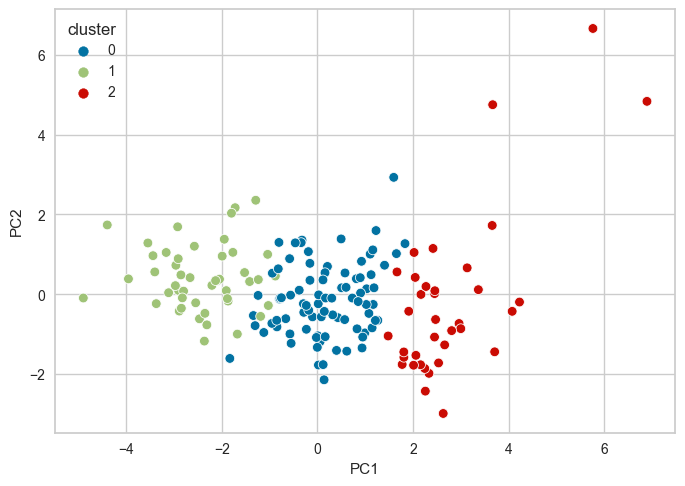

In [28]:
plot_cluster_points(normalized_df[:], kmeans.labels_)

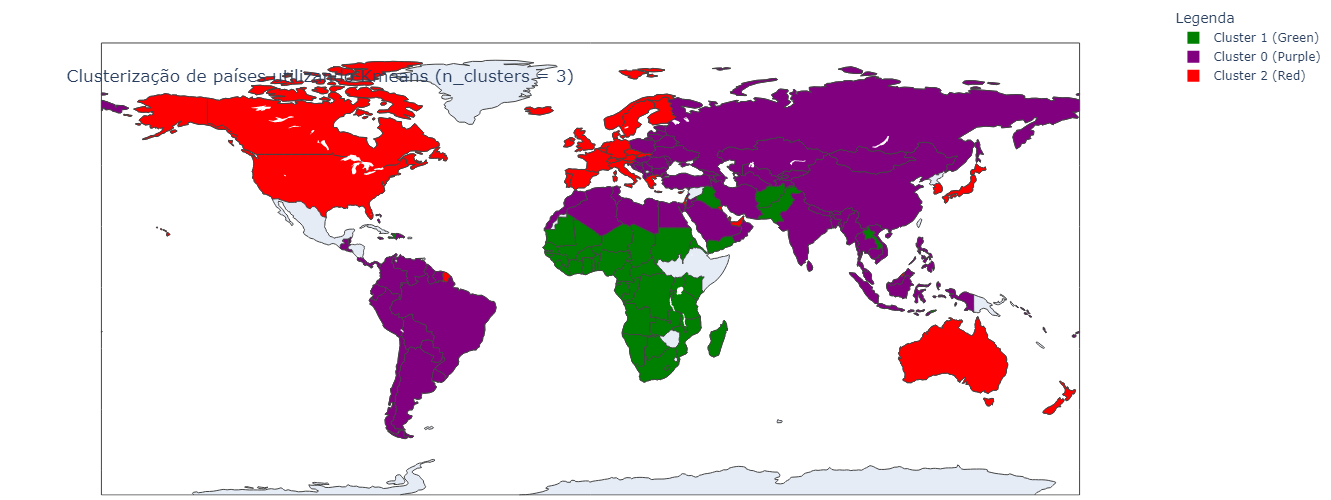

In [29]:
plot_cluster_map(normalized_df[:], kmeans.labels_, 'Kmeans')

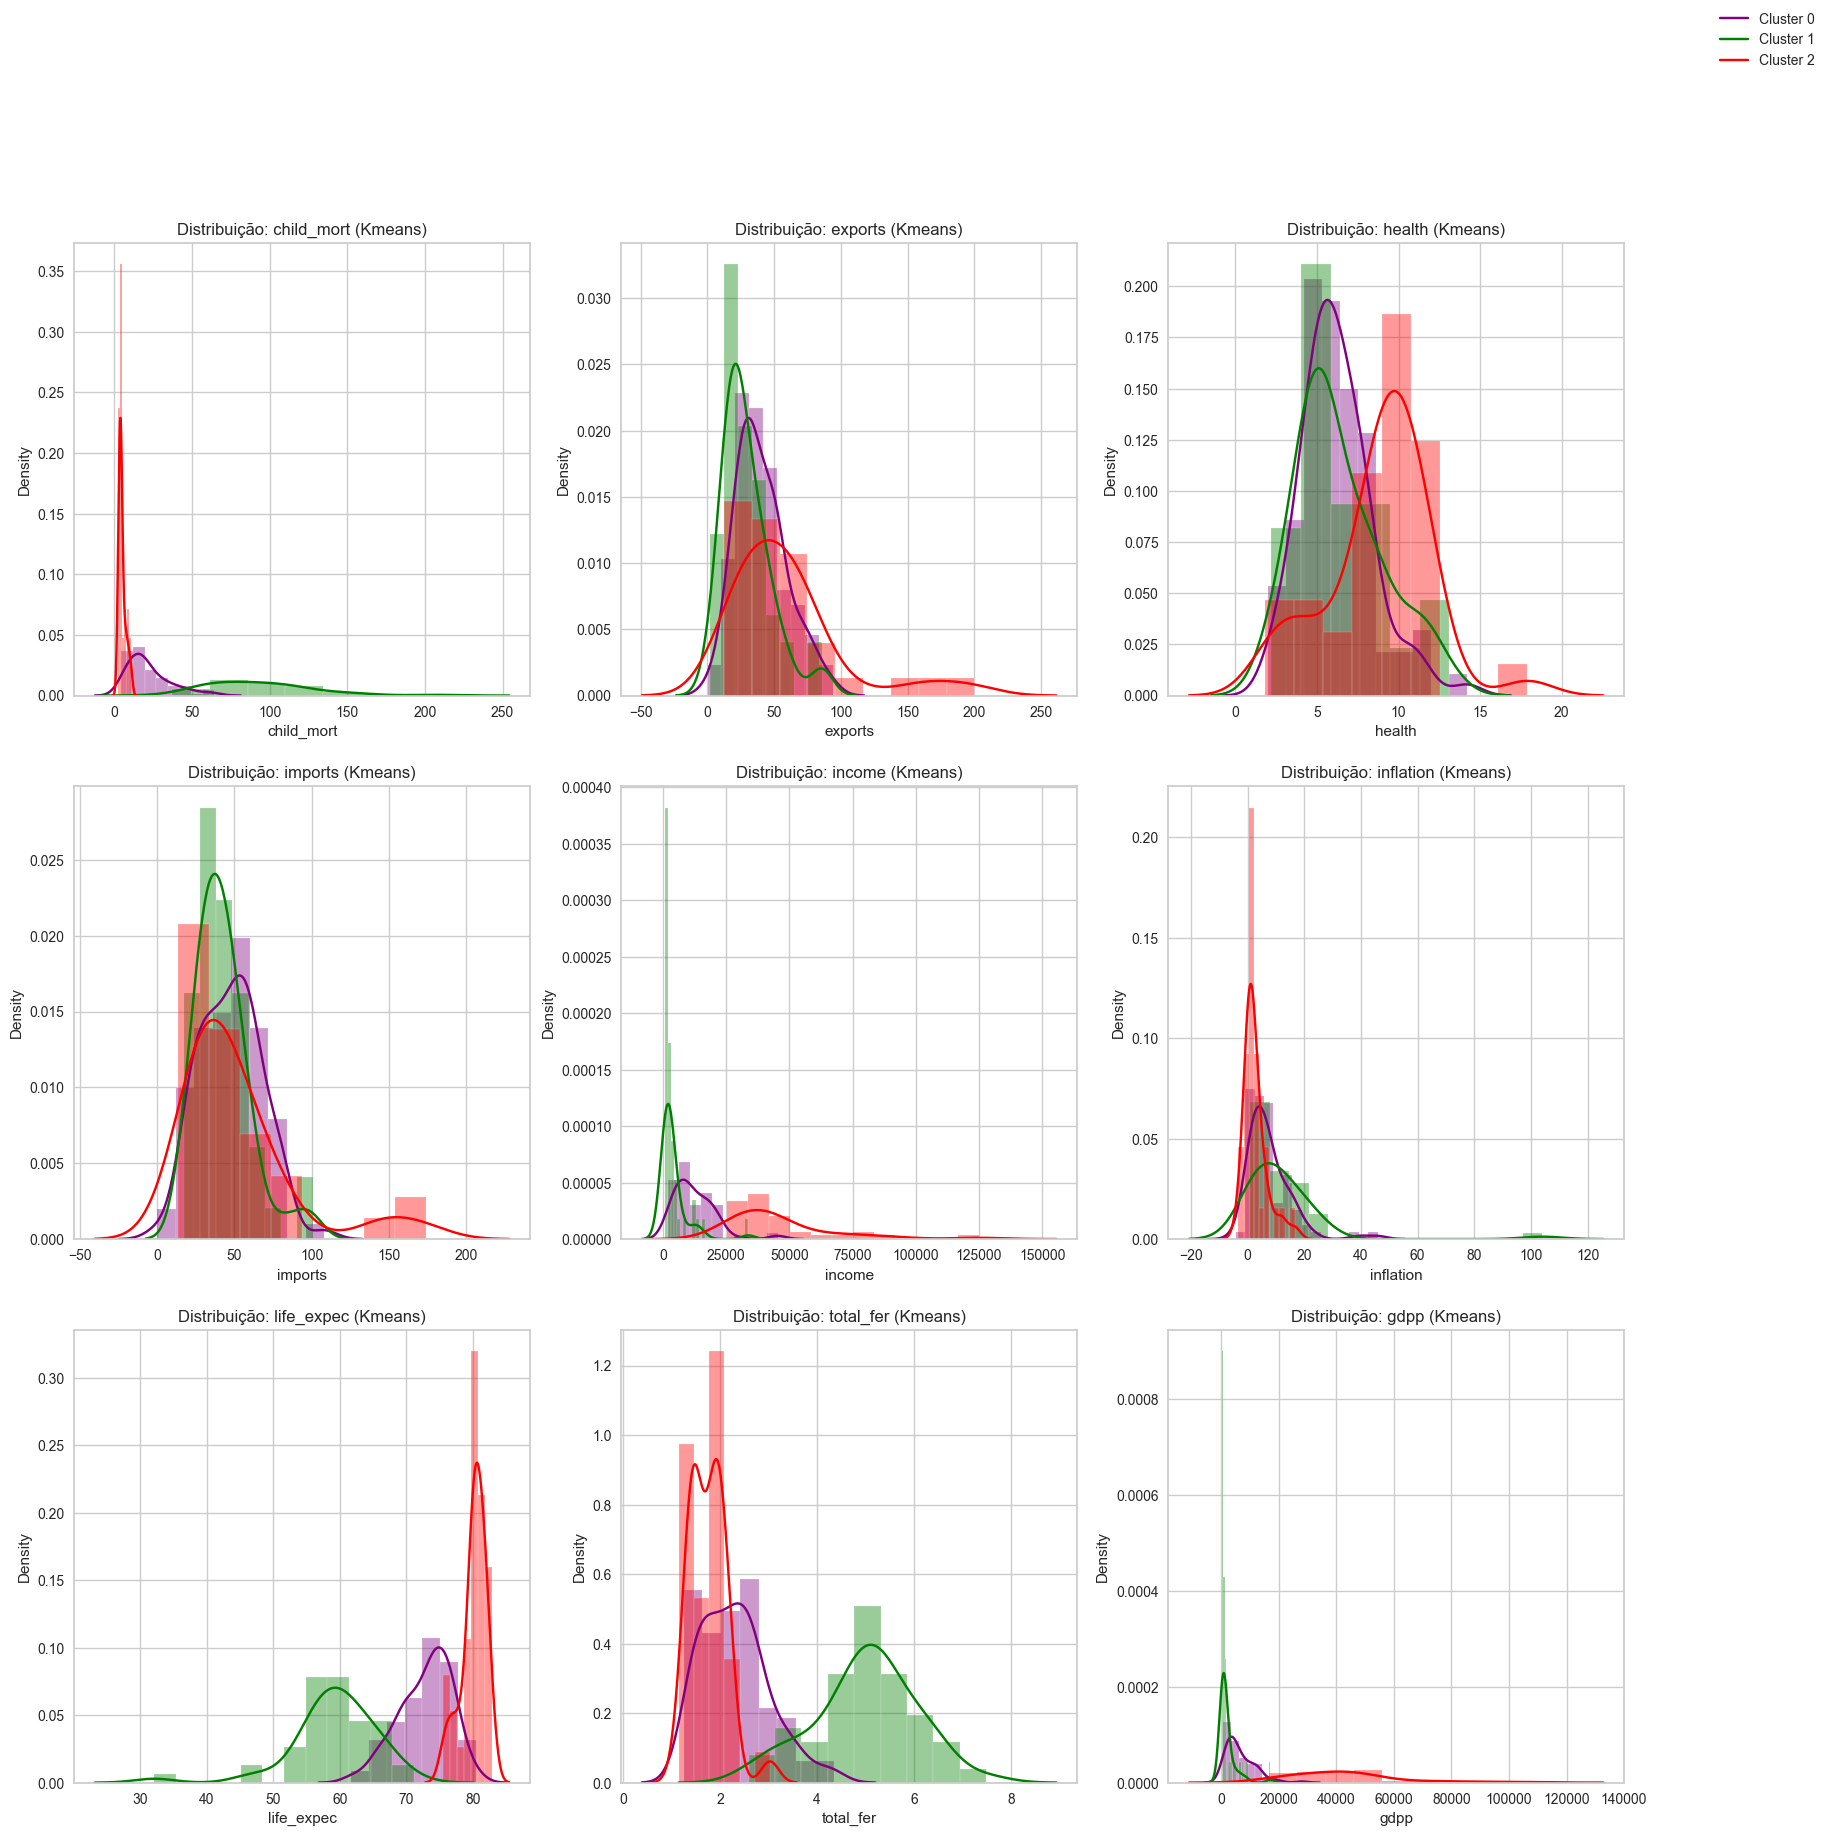

In [30]:
plot_destribution_by_cluster(df[:], kmeans.labels_, methodlabel = 'Kmeans')

In [31]:
set(kmeans.labels_)

{0, 1, 2}

In [32]:
dist_df = df.copy(deep=True)    
dist_df['cluster'] = kmeans.labels_

In [33]:
dist_df[(dist_df['cluster'] == 0)].describe(percentiles=[.75]).T
for x in set(kmeans.labels_):                
    print('-----------------------------------------------') 
    print('Cluster ', str(x))
    print('    ')
    for i in range(len(n_features)):    
        print(n_features[i].ljust(15, '.'), ' mean:', round(dist_df[(dist_df['cluster'] == x)][n_features[i]].mean(), 2))
        print(n_features[i].ljust(15, '.'), '  max:', dist_df[(dist_df['cluster'] == x)][n_features[i]].max())
        print(n_features[i].ljust(15, '.'), '  75%:', round(dict(dist_df[(dist_df['cluster'] == x)][n_features[i]].quantile([.75]))[0.75],2))       
        print('')
    

-----------------------------------------------
Cluster  0
    
child_mort.....  mean: 21.93
child_mort.....   max: 64.4
child_mort.....   75%: 28.35

exports........  mean: 40.24
exports........   max: 93.8
exports........   75%: 51.4

health.........  mean: 6.2
health.........   max: 14.2
health.........   75%: 7.36

imports........  mean: 47.47
imports........   max: 108.0
imports........   75%: 60.42

income.........  mean: 12305.6
income.........   max: 45400
income.........   75%: 16650.0

inflation......  mean: 7.6
inflation......   max: 45.9
inflation......   75%: 10.02

life_expec.....  mean: 72.81
life_expec.....   max: 80.4
life_expec.....   75%: 76.1

total_fer......  mean: 2.31
total_fer......   max: 4.34
total_fer......   75%: 2.66

gdpp...........  mean: 6486.45
gdpp...........   max: 28000
gdpp...........   75%: 9070.0

-----------------------------------------------
Cluster  1
    
child_mort.....  mean: 92.96
child_mort.....   max: 208.0
child_mort.....   75%: 111.0



## Clusterização Hierárquica

Text(0, 0.5, 'Euclidean Distance')

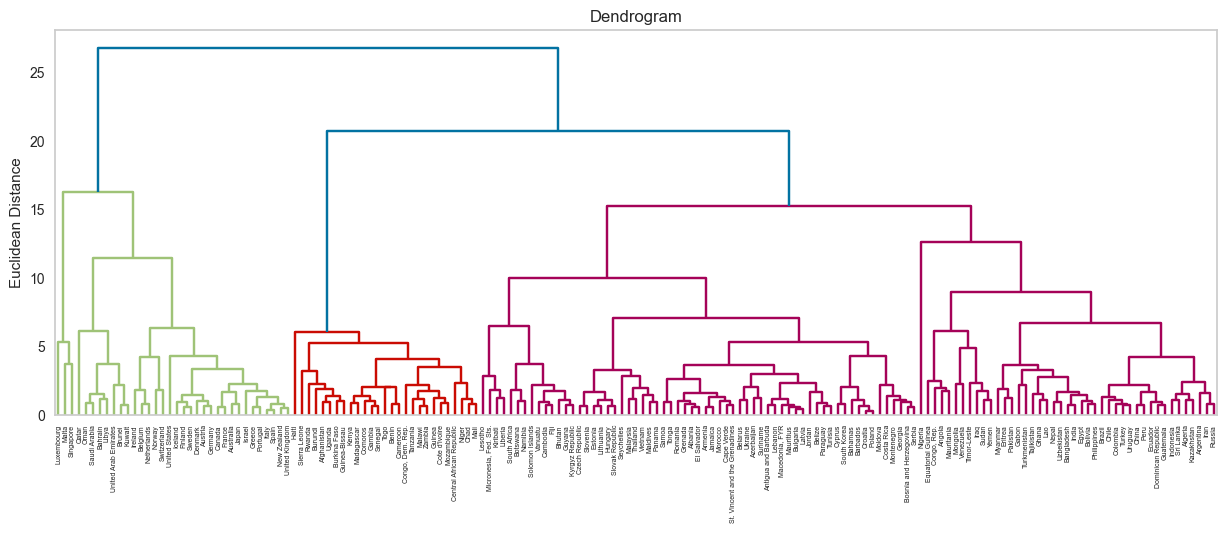

In [34]:
pyplot.figure(figsize=(15, 5))
pyplot.grid(False)
dendrogram = sch.dendrogram(sch.linkage(normalized_df[:], method='ward'), labels=df.index)
pyplot.title('Dendrogram')
pyplot.ylabel('Euclidean Distance')

In [35]:
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = numpy.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = numpy.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = numpy.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    sch.dendrogram(linkage_matrix, **kwargs)

Text(0, 0.5, 'Euclidean Distance')

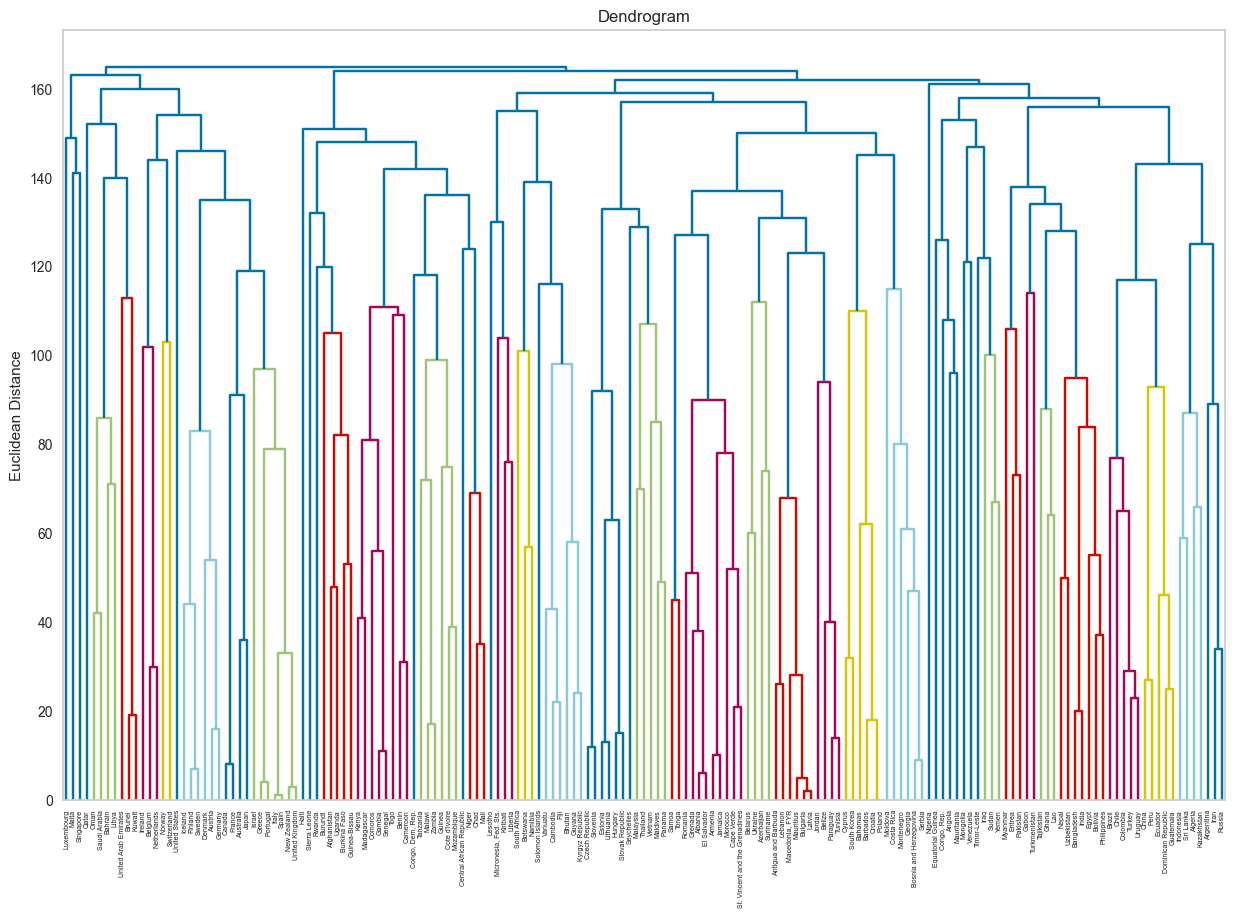

In [36]:
hc = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = 'ward')
hc_pred = hc.fit_predict(normalized_df[:])

pyplot.figure(figsize=(15, 10))
pyplot.grid(False)
plot_dendrogram(hc, labels=normalized_df.index)
pyplot.title('Dendrogram')
pyplot.ylabel('Euclidean Distance')

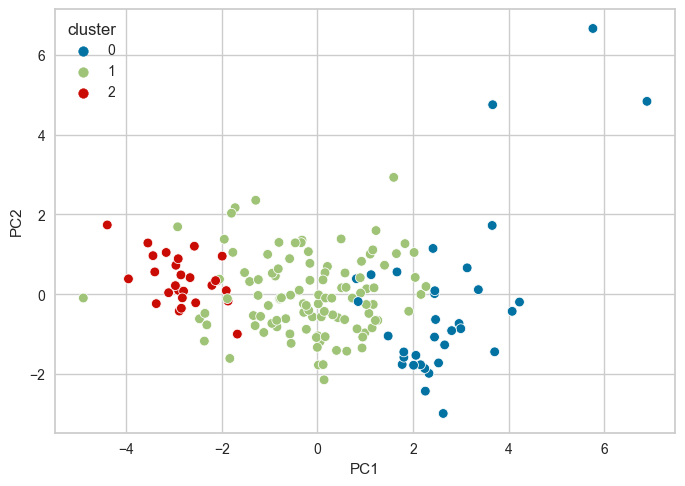

In [37]:
plot_cluster_points(normalized_df[:], hc.labels_)

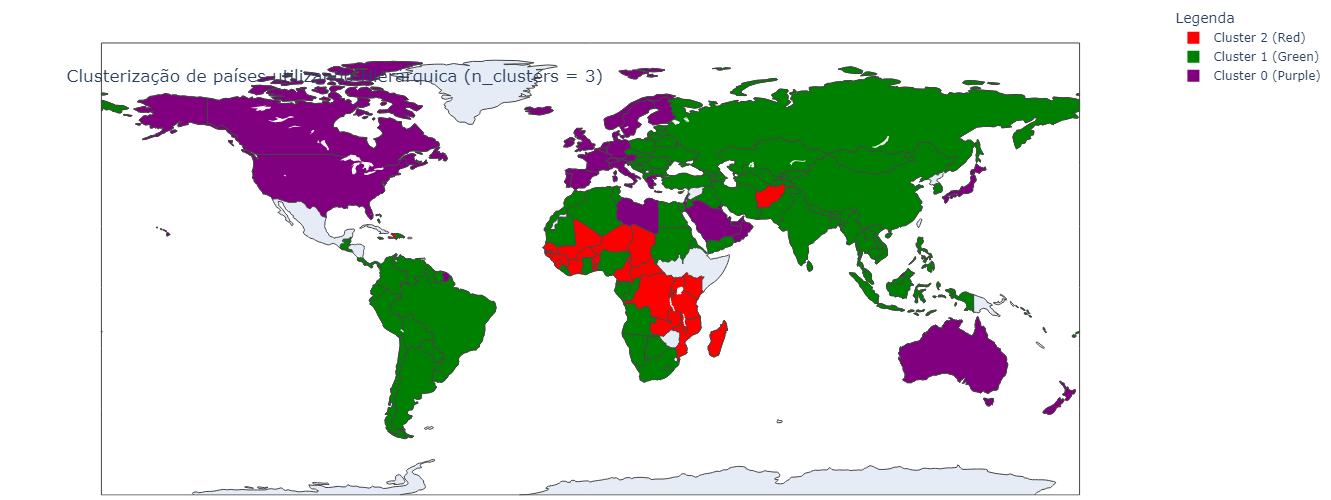

In [38]:
plot_cluster_map(normalized_df[:], hc.labels_, 'Hierárquica')

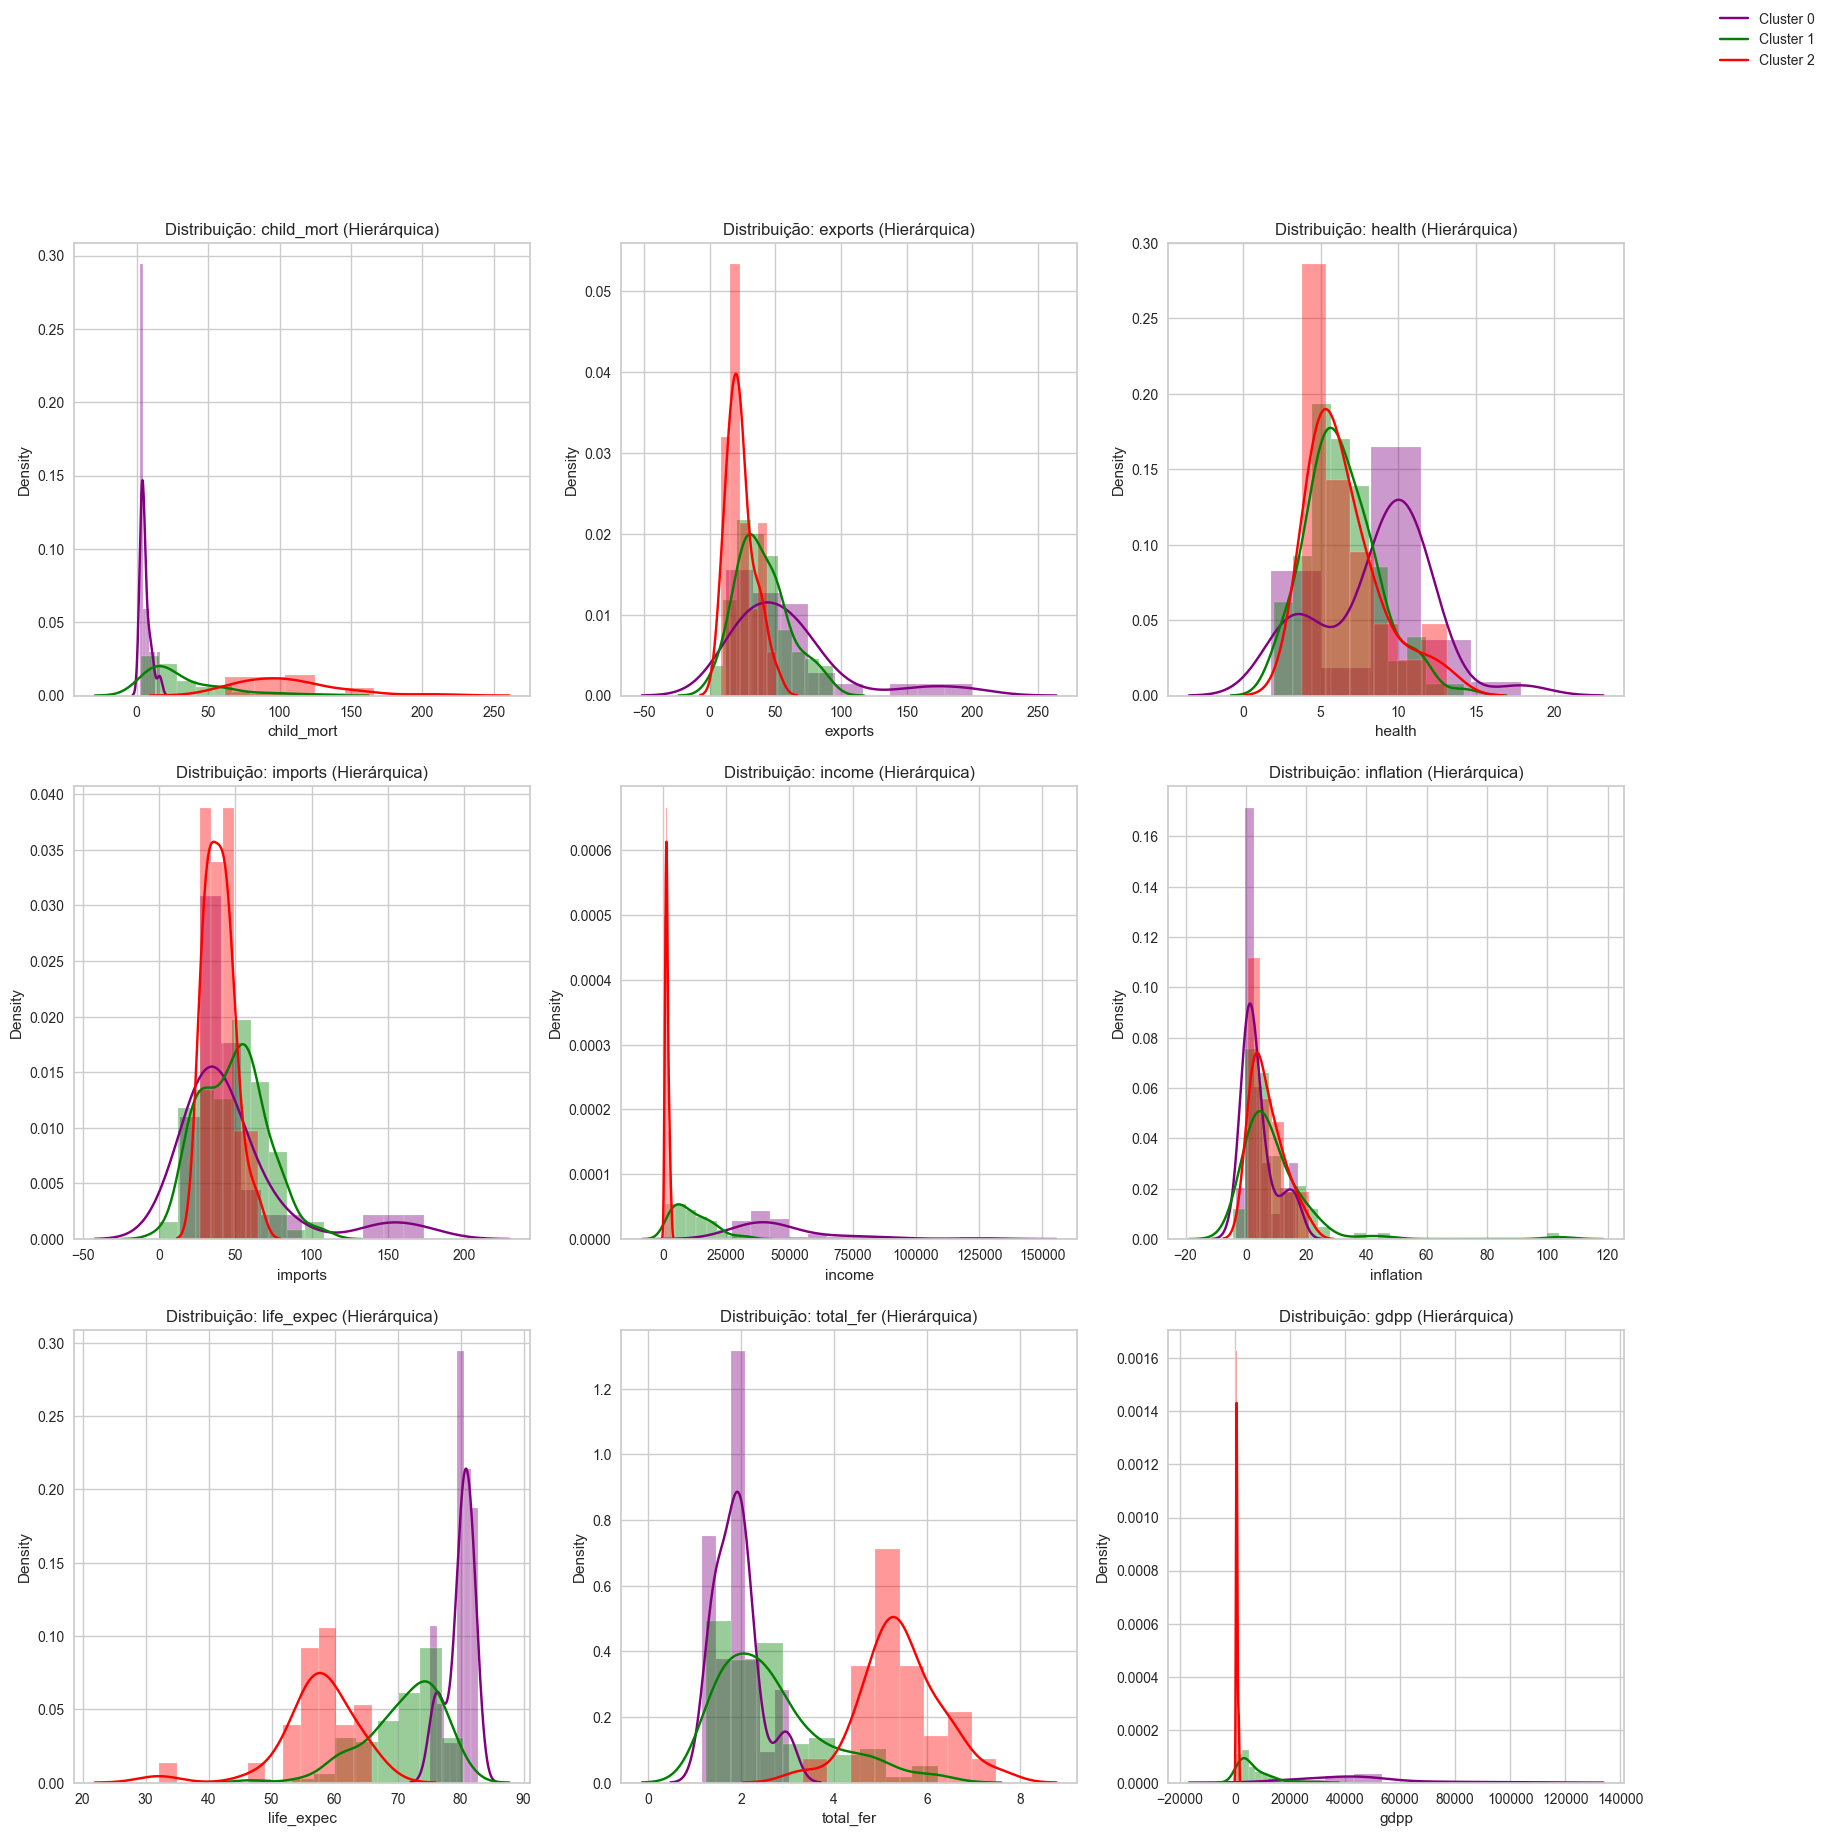

In [39]:
plot_destribution_by_cluster(df[:], hc.labels_, methodlabel = 'Hierárquica')

## k-medoids

In [40]:
kmedoids = KMedoids(n_clusters=3, random_state=0).fit(normalized_df[:])

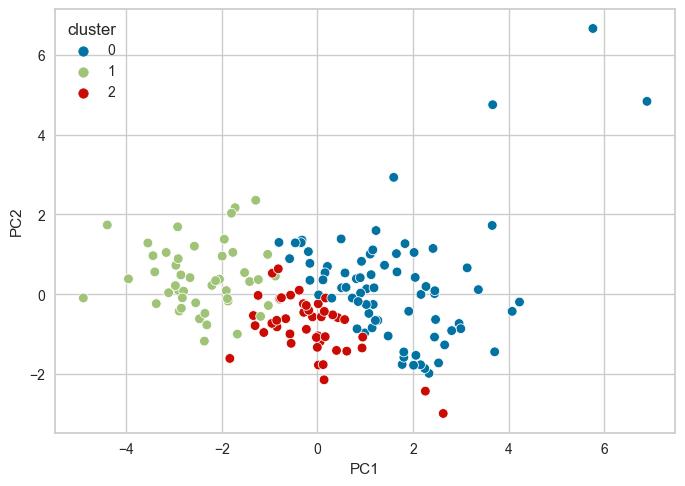

In [41]:
plot_cluster_points(normalized_df[:], kmedoids.labels_)

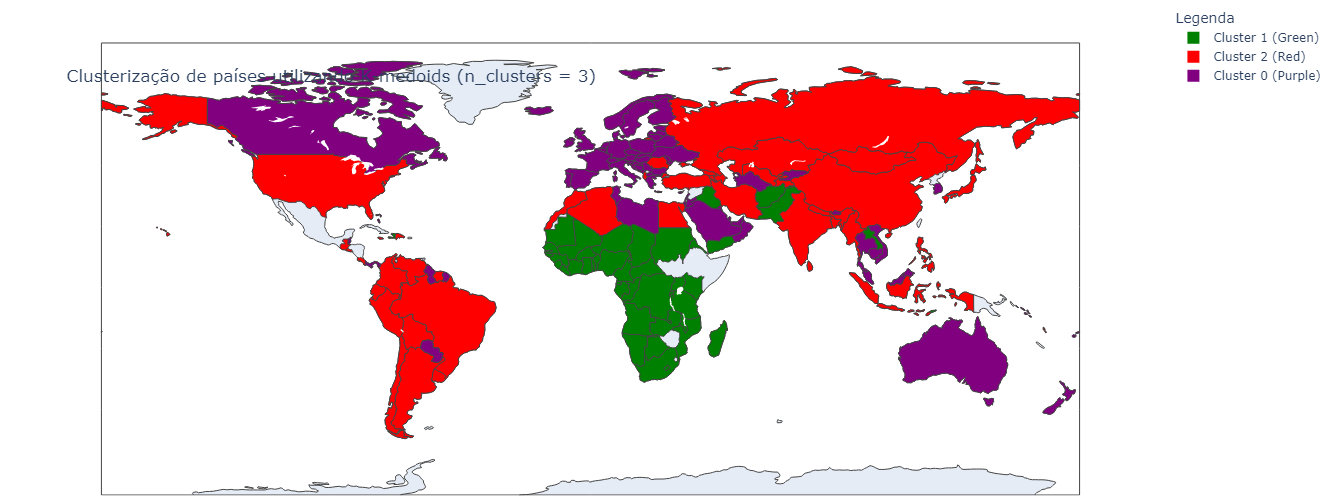

In [42]:
plot_cluster_map(normalized_df[:], kmedoids.labels_, 'K-medoids')

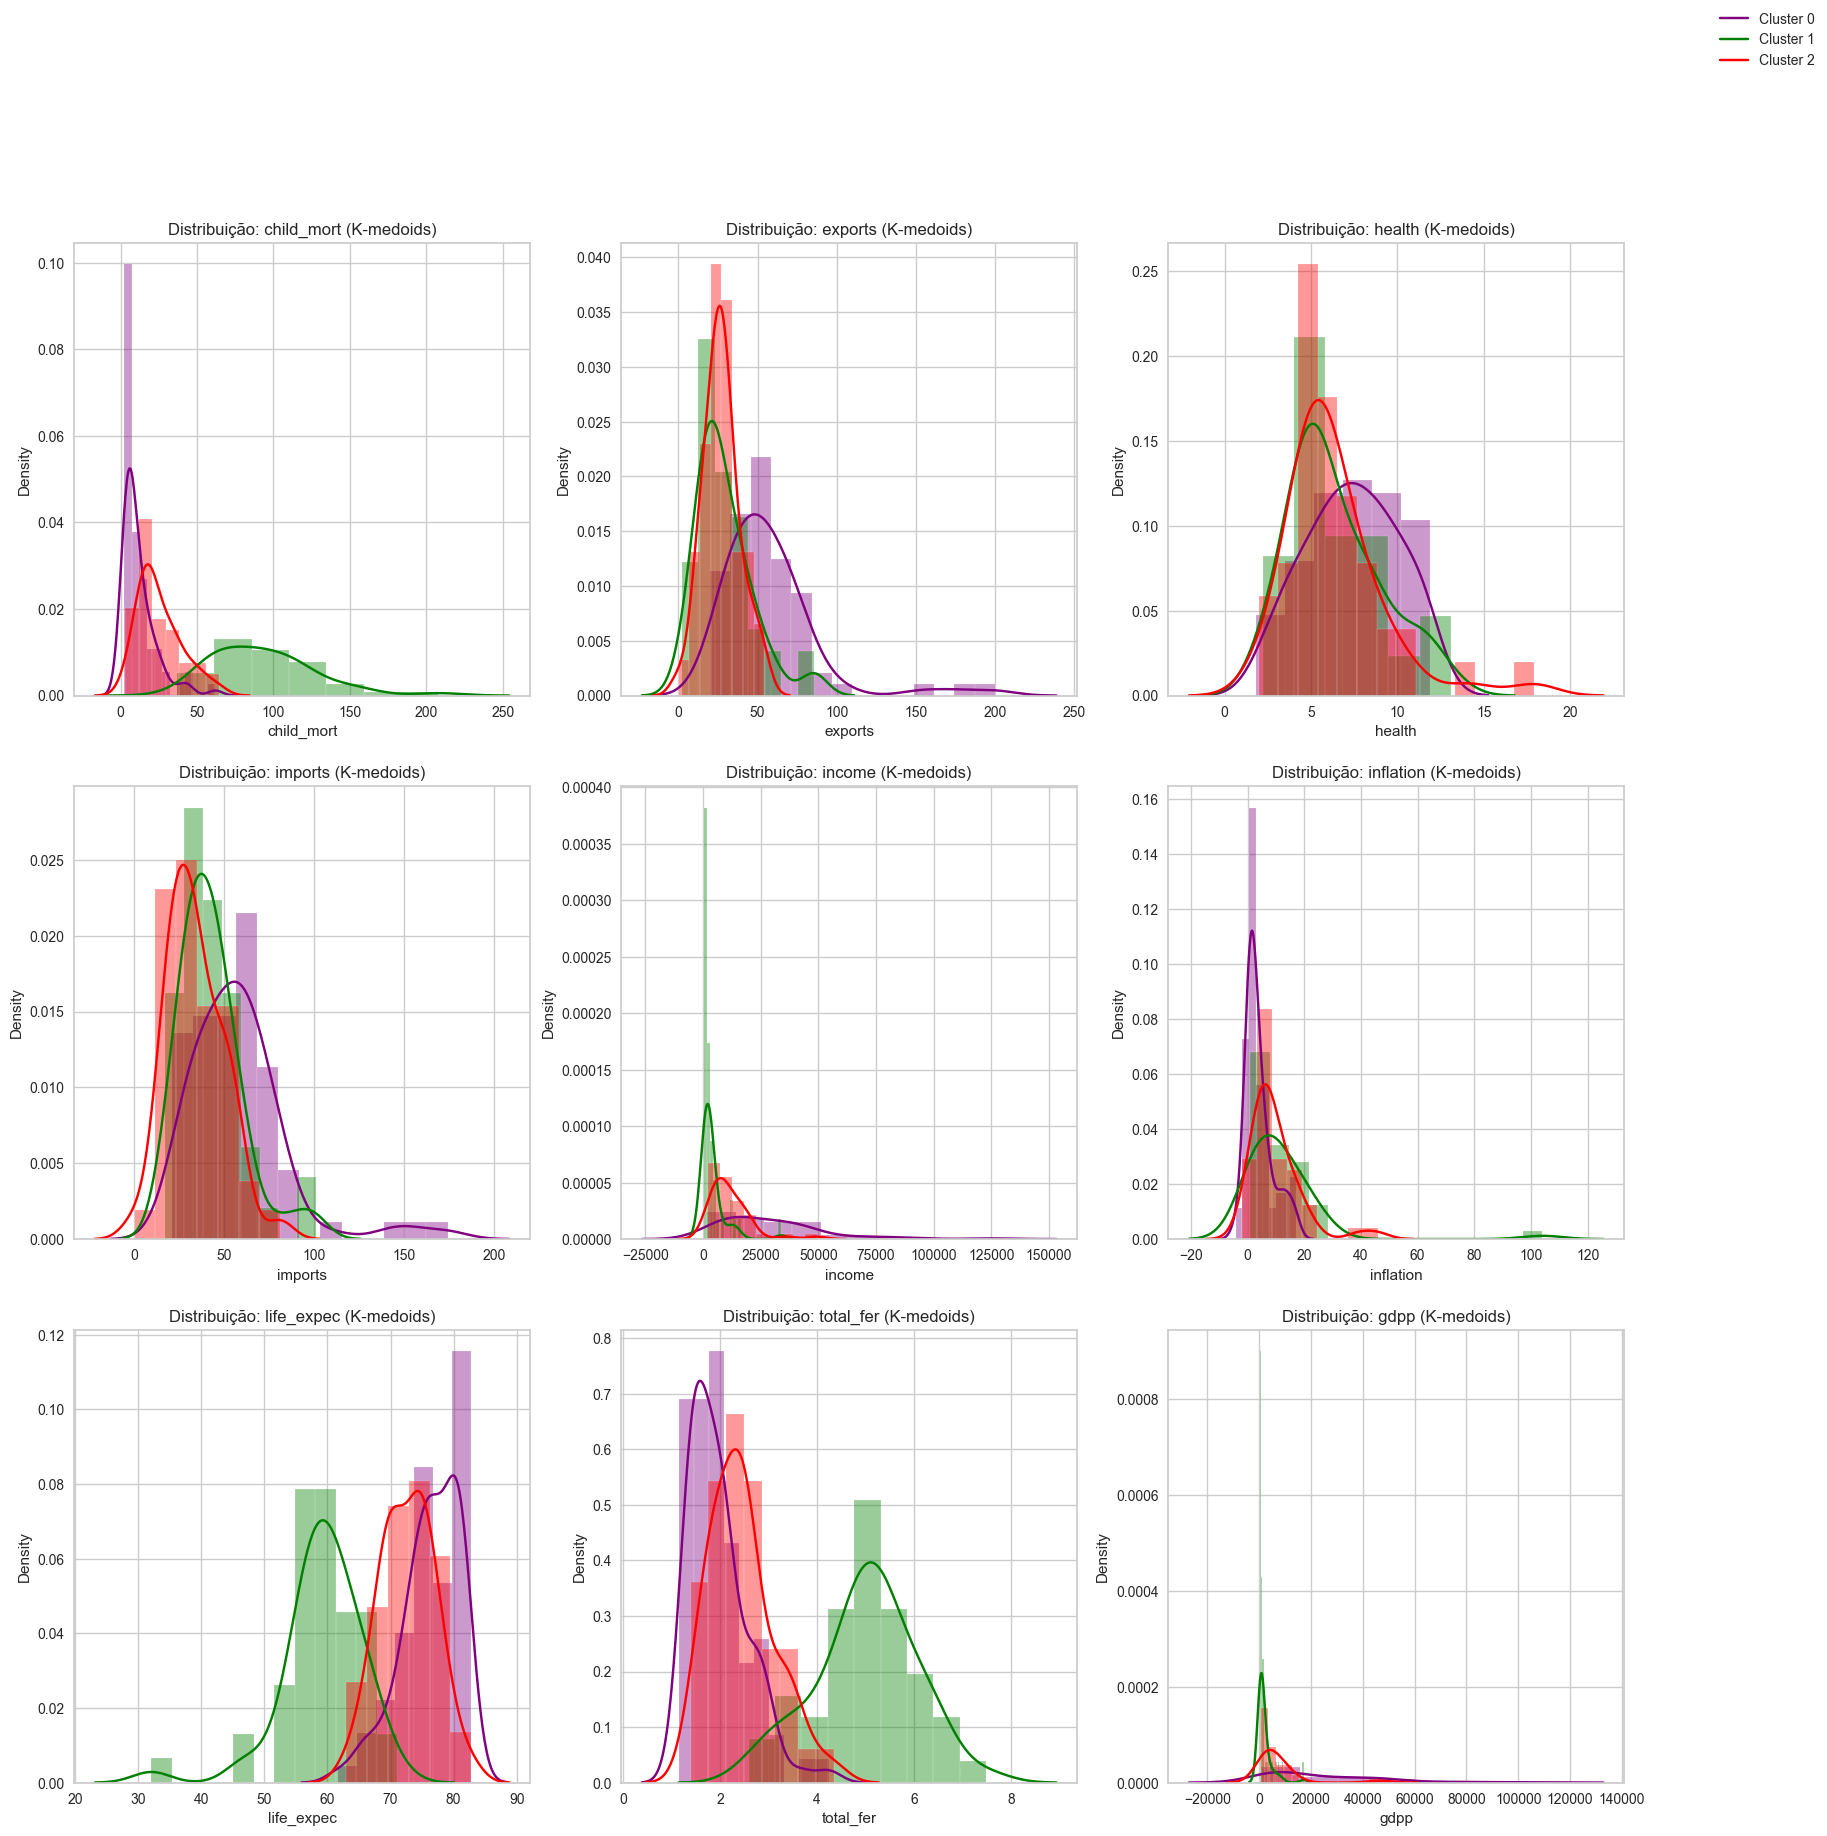

In [43]:
plot_destribution_by_cluster(df[:], kmedoids.labels_, methodlabel = 'K-medoids')

In [44]:
analise_df= df.copy(deep=True)
analise_df['country'] = df.index
analise_df['cluster'] = kmedoids.labels_

In [45]:
for x in kmedoids.medoid_indices_:
    s_pais = analise_df.index[x]    
    n_cluster = analise_df.loc[s_pais]['cluster']
    print('País Medoid cluster', n_cluster, ':', s_pais, '(medoid_indice =', x, ')')

País Medoid cluster 0 : Antigua and Barbuda (medoid_indice = 4 )
País Medoid cluster 1 : Tanzania (medoid_indice = 147 )
País Medoid cluster 2 : Dominican Republic (medoid_indice = 45 )
